<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/CNN_With_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
np.random.seed(19)

In [ ]:
df=pd.read_csv("combinedSample_GoldDs.csv")

In [ ]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017


In [ ]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [ ]:
df.shape

(371279, 15)

In [ ]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [ ]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [ ]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,64608.9986,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,71534.9987,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,38320.0012,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,26130.0001,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,30500.0003,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [ ]:
#data.isna.isany()
#data['open'].plot(figsize=(15,6))

In [ ]:

#normalization
data=(data-data.min())/(data.max()-data.min())

In [ ]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,0.021363,0.038988,0.125967,0.130772,0.137818,0.140713
1,0.023653,0.051443,0.129923,0.131973,0.141810,0.143297
2,0.012671,0.038068,0.132383,0.132824,0.144124,0.144349
3,0.008640,0.023132,0.133379,0.132849,0.142495,0.142133
4,0.010085,0.031235,0.131034,0.130764,0.140916,0.140899


In [ ]:
np.random.seed(19)

In [ ]:
print(data.head(n=5))
print(data[-5:])

   Volume_Bid  Volume_Ask      Open      High       Low     Close
0    0.021363    0.038988  0.125967  0.130772  0.137818  0.140713
1    0.023653    0.051443  0.129923  0.131973  0.141810  0.143297
2    0.012671    0.038068  0.132383  0.132824  0.144124  0.144349
3    0.008640    0.023132  0.133379  0.132849  0.142495  0.142133
4    0.010085    0.031235  0.131034  0.130764  0.140916  0.140899
        Volume_Bid  Volume_Ask      Open      High       Low     Close
371274    0.003809    0.012897  0.785339  0.786228  0.793662  0.789447
371275    0.003402    0.015334  0.786724  0.788796  0.794671  0.793563
371276    0.001270    0.002914  0.790729  0.790754  0.798524  0.795500
371277    0.001746    0.007565  0.792612  0.790772  0.800340  0.794850
371278    0.001696    0.004352  0.792190  0.791118  0.800259  0.795753


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371279 entries, 0 to 371278
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Volume_Bid  371279 non-null  float64
 1   Volume_Ask  371279 non-null  float64
 2   Open        371279 non-null  float64
 3   High        371279 non-null  float64
 4   Low         371279 non-null  float64
 5   Close       371279 non-null  float64
dtypes: float64(6)
memory usage: 17.0 MB


In [ ]:
#downsizing
data['Volume_Bid']=pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']=pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Open']=pd.to_numeric(data['Open'],downcast='float')
data['High']=pd.to_numeric(data['High'],downcast='float')
data['Low']=pd.to_numeric(data['Low'],downcast='float')
data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371279 entries, 0 to 371278
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Volume_Bid  371279 non-null  float32
 1   Volume_Ask  371279 non-null  float32
 2   Open        371279 non-null  float32
 3   High        371279 non-null  float32
 4   Low         371279 non-null  float32
 5   Close       371279 non-null  float32
dtypes: float32(6)
memory usage: 8.5 MB


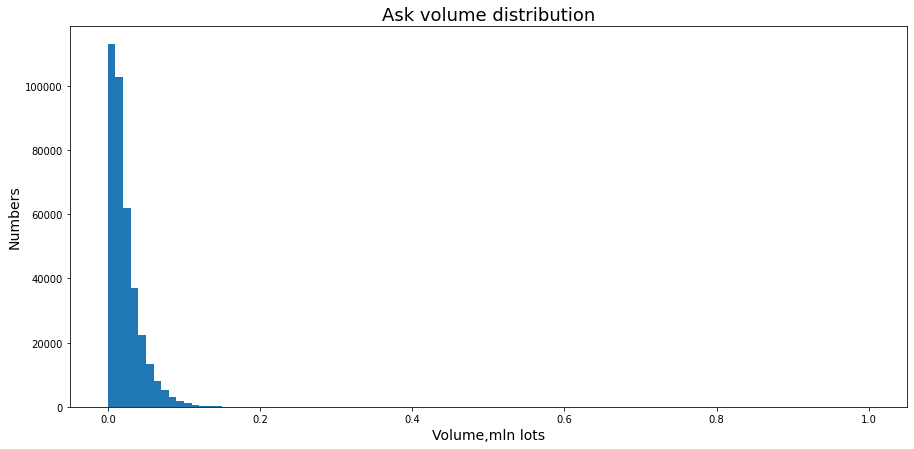

In [ ]:
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Ask volume distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume,mln lots',size=14);

In [ ]:
n=data.shape[0]
p=data.shape[1]

#one week data
n_small=250000
data_a=np.array(data[:n_small])
print("data_a:")
print(data_a[:4])
print('\n')
print(data_a[-4:])
print('\n',"Tick number in the DataFrame: n_small=",n_small,'\n')
print("numpy size:                                =",data_a.shape)

data_a:
[[0.02136336 0.03898769 0.12596732 0.13077244 0.1378183  0.14071327]
 [0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
 [0.01267074 0.03806827 0.13238275 0.13282366 0.1441241  0.14434902]
 [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463 0.14213327]]


[[0.00282711 0.0050202  0.4754246  0.47436056 0.48540077 0.48249093]
 [0.00341568 0.00419941 0.47587925 0.47462827 0.48590878 0.48271793]
 [0.00231459 0.00283778 0.476173   0.47467926 0.4859469  0.4827053 ]
 [0.00303542 0.00494385 0.47602487 0.4748501  0.4860612  0.48278603]]

 Tick number in the DataFrame: n_small= 250000 

numpy size:                                = (250000, 6)


In [ ]:
data=[]
data

[]

In [ ]:
N=50
L=n_small-N
print('Size of a three-dimensional data tensor: ',L,N,6)

Size of a three-dimensional data tensor:  249950 50 6


In [ ]:
from tqdm import tqdm

In [ ]:
data_b=np.zeros((L,N,6),dtype='float64')
Y=np.zeros((L,4),dtype='float64')

In [ ]:
print('n_small-N=',n_small-N)

n_small-N= 249950


In [ ]:
print('n_small-N=',n_small-N)
for k in tqdm(range(n_small-N)):
    data_b[k,:,:]=data_a[k:k+N,:]
    Y[k,0]=data_a[k+N,2]
    Y[k,1]=data_a[k+N,3]
    Y[k,2]=data_a[k+N,4]
    Y[k,3]=data_a[k+N,5]
print(k)
print('data_b:','\n',data_b)
print("Numpy size:",data_b.shape,'\n')
print(Y[:5,:])
print(Y[-10:,:])
print("Numpy size:",Y.shape)

n_small-N= 249950


100%|██████████| 249950/249950 [00:00<00:00, 251874.65it/s]

249949
data_b: 
 [[[0.02136336 0.03898769 0.12596732 0.13077244 0.13781831 0.14071327]
  [0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
  [0.01267074 0.03806827 0.13238275 0.13282366 0.14412411 0.14434902]
  ...
  [0.01228387 0.01943817 0.12703635 0.12626846 0.13735728 0.13696404]
  [0.00335285 0.0058919  0.12589963 0.12541433 0.13777131 0.13683793]
  [0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]]

 [[0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
  [0.01267074 0.03806827 0.13238275 0.13282366 0.14412411 0.14434902]
  [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463 0.14213327]
  ...
  [0.00335285 0.0058919  0.12589963 0.12541433 0.13777131 0.13683793]
  [0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]
  [0.01111005 0.01969904 0.12513331 0.12466217 0.13600594 0.13570294]]

 [[0.01267074 0.03806827 0.13238275 0.13282366 0.14412411 0.14434902]
  [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463

In [ ]:
data_a=[]
data_a

[]

In [ ]:
import random 
pp=random.randint(10,n_small-N-1)
print('random int = ',pp)
print('data_b','\t\t\t\t\t\t\t\t','Y:')
print('Open','\t\t','High','\t\t','low','\t\t','close','\t\t','Open','\t\t','High','\t\t','low','\t\t','close')
for i in range(7):
    print(data_b[pp+i,N-1,2],'\t',data_b[pp+i,N-1,3],'\t',data_b[pp+i,N-1,4],'\t',data_b[pp+i,N-1,5],'\t',
          Y[pp+i,0],'\t',Y[pp+i,1],'\t',Y[pp+i,2],'\t',Y[pp+i,3])

random int =  104762
data_b 								 Y:
Open 		 High 		 low 		 close 		 Open 		 High 		 low 		 close
0.2536078095436096 	 0.2528594434261322 	 0.2645389139652252 	 0.26271185278892517 	 0.253343403339386 	 0.2525828182697296 	 0.2640435993671417 	 0.2625100910663605
0.253343403339386 	 0.2525828182697296 	 0.2640435993671417 	 0.2625100910663605 	 0.25303688645362854 	 0.25193265080451965 	 0.26342126727104187 	 0.26204347610473633
0.25303688645362854 	 0.25193265080451965 	 0.26342126727104187 	 0.26204347610473633 	 0.25254642963409424 	 0.25265419483184814 	 0.2637844979763031 	 0.2631986439228058
0.25254642963409424 	 0.25265419483184814 	 0.2637844979763031 	 0.2631986439228058 	 0.25379809737205505 	 0.25367024540901184 	 0.2644627094268799 	 0.2625983655452728
0.25379809737205505 	 0.25367024540901184 	 0.2644627094268799 	 0.2625983655452728 	 0.2532029151916504 	 0.2520983815193176 	 0.26390770077705383 	 0.2622238099575043
0.2532029151916504 	 0.2520983815193176 	 0.263907700

In [ ]:
print('\t','\t Max \t\t Min')
mnx=data_b[:,:,0].max()
mmn=data_b[:,:,0].min()
print('Volume_bid','\t',mnx,'\t\t',mmn)
mnx=data_b[:,:,1].max()
mmn=data_b[:,:,1].min()
print('Volume_Ask','\t',mnx,'\t',mmn)
mnx=data_b[:,:,2].max()
mmn=data_b[:,:,2].min()
print('Open','\t\t',mnx,'\t',mmn)
mnx=data_b[:,:,3].max()
mmn=data_b[:,:,3].min()
print('High','\t\t',mnx,'\t',mmn)
mnx=data_b[:,:,4].max()
mmn=data_b[:,:,4].min()
print('Low','\t\t',mnx,'\t',mmn)
mnx=data_b[:,:,5].max()
mmn=data_b[:,:,5].min()
print('Close','\t\t',mnx,'\t',mmn)

	 	 Max 		 Min
Volume_bid 	 1.0 		 0.0
Volume_Ask 	 0.8096268177032471 	 0.0
Open 		 0.609148383140564 	 0.0
High 		 0.6074926853179932 	 0.0
Low 		 0.6172917485237122 	 0.0
Close 		 0.6140284538269043 	 0.0


In [ ]:
train_start=0
train_end=int(np.floor(0.9*L))
print(L,train_end)

249950 224955


In [ ]:

train_end_=4955
print(train_end)

224955


In [ ]:
test_start=train_end+1
test_end=L
print(test_start,test_end)

224956 249950


In [ ]:
print(test_end-train_end)

24995


In [ ]:
X_train=np.zeros((train_end,N,6),dtype='float32')
X_test=np.zeros((test_end-train_end,N,6),dtype='float32')
for z in tqdm(range(test_end)):
    if z<train_end:
        X_train[z,:,:]=data_b[z,:,:]
    else:
        X_test[z-train_end,:,:]=data_b[z,:,:]
print('\n',"X_train:",X_train.shape,'\n')
print("X_test:",X_test.shape,'\n')

100%|██████████| 249950/249950 [00:00<00:00, 653426.29it/s]


 X_train: (224955, 50, 6) 

X_test: (24995, 50, 6) 



In [ ]:
print(X_train[:5,N-1,:])
print(X_train[-5:,N-1,:],'\n')
print(X_test[:5,N-1,:])
print(X_test[-5:,N-1,:])

[[0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]
 [0.01111005 0.01969904 0.1251333  0.12466217 0.13600594 0.13570294]
 [0.01439015 0.02555913 0.12466074 0.12425422 0.13617106 0.13584165]
 [0.01003541 0.01736392 0.12476292 0.12463667 0.13666637 0.13653526]
 [0.00501605 0.00780072 0.12542707 0.12495538 0.13715407 0.13676226]]
[[0.00887812 0.01580505 0.26078188 0.26054287 0.271796   0.27100232]
 [0.00884836 0.01529603 0.26165038 0.26128992 0.27267486 0.27145883]
 [0.00817051 0.01626953 0.26213828 0.26139957 0.27313715 0.27170855]
 [0.00742323 0.01518786 0.26238605 0.2618636  0.27316254 0.27131256]
 [0.00485073 0.00982407 0.2620029  0.261833   0.27319303 0.27153197]] 

[[0.00611714 0.01140839 0.26225322 0.26131034 0.27260372 0.27107295]
 [0.00809446 0.01952089 0.2617679  0.26211092 0.27273074 0.27196077]
 [0.00862351 0.01754207 0.26274112 0.26254818 0.27335814 0.2728183 ]
 [0.00994614 0.02914135 0.2634768  0.263526   0.2747298  0.2733732 ]
 [0.00719838 0.01757389 0.2640

In [ ]:
y_train=Y[np.arange(train_start,train_end),:]
y_test=Y[np.arange(test_start,L),:]

print(train_start,train_end,test_start,L,'\n')
print('y_train(first 10):','\n',y_train[:10,:])

data_add_row=np.array([y_test[L-test_start-1,0],y_test[L-test_start-1,1],y_test[L-test_start-1,2],y_test[L-test_start-1,3]])
print(L-test_start-1,data_add_row)
y_test=np.vstack([y_test,data_add_row])

print('y_test(last 10:)','\n',y_test[-10:,:])

0 224955 224956 249950 

y_train(first 10): 
 [[0.12513331 0.12466217 0.13600594 0.13570294]
 [0.12466074 0.12425422 0.13617106 0.13584165]
 [0.12476292 0.12463667 0.13666637 0.13653526]
 [0.12542707 0.12495538 0.13715407 0.13676226]
 [0.12554201 0.12476926 0.13696738 0.13657309]
 [0.1254143  0.12492988 0.13693815 0.13685054]
 [0.12582301 0.1274821  0.13784751 0.13920879]
 [0.12813985 0.12738138 0.13952906 0.13881406]
 [0.12774776 0.12713917 0.13904518 0.13806497]
 [0.12700698 0.12679496 0.13890167 0.13819107]]
24993 [0.47602487 0.47485009 0.48606119 0.48278603]
y_test(last 10:) 
 [[0.47677842 0.47528353 0.48650572 0.48308867]
 [0.47629309 0.47480673 0.48585799 0.48281881]
 [0.47619855 0.47493932 0.48579067 0.48293608]
 [0.4762969  0.47482458 0.48597229 0.48254642]
 [0.47593546 0.47445488 0.48522297 0.48200414]
 [0.47542459 0.47436056 0.48540077 0.48249093]
 [0.47587925 0.47462827 0.48590878 0.48271793]
 [0.47617301 0.47467926 0.48594689 0.4827053 ]
 [0.47602487 0.47485009 0.48606119 0

In [ ]:
print('Data for training')
print("X_train")
print("Type:", X_train.dtype, type(X_train),":Size:",X_train.shape)

print("\n","y_train")
print("Type:",y_train.dtype,type(y_train),":size:",y_train.shape)

print('Data for testing')
print("X_test")
print("Type:",X_test.dtype, type(X_test),":Size:",X_test.shape)

print("\n","y_test")
print("Type:",y_test.dtype,type(y_test),":size:",y_test.shape)

Data for training
X_train
Type: float32 <class 'numpy.ndarray'> :Size: (224955, 50, 6)

 y_train
Type: float64 <class 'numpy.ndarray'> :size: (224955, 4)
Data for testing
X_test
Type: float32 <class 'numpy.ndarray'> :Size: (24995, 50, 6)

 y_test
Type: float64 <class 'numpy.ndarray'> :size: (24995, 4)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential([
    keras.layers.Conv1D(50,9,padding='same',input_shape=(50,6),activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7,padding='same',activation=tf.nn.relu,kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25,activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(4)
    
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 50, 50)            2750      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 50)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 4)                 1

In [ ]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [ ]:
history=model.fit(X_train,y_train,batch_size=20,epochs=12,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/12
8999/8999 [==============================] - 47s 4ms/step - loss: 6.6606e-05 - mae: 0.0031 - val_loss: 7.3149e-06 - val_mae: 0.0022
Epoch 2/12
8999/8999 [==============================] - 35s 4ms/step - loss: 5.7282e-06 - mae: 0.0017 - val_loss: 1.0846e-06 - val_mae: 6.9759e-04
Epoch 3/12
8999/8999 [==============================] - 36s 4ms/step - loss: 3.7758e-06 - mae: 0.0013 - val_loss: 1.5726e-06 - val_mae: 9.8248e-04
Epoch 4/12
8999/8999 [==============================] - 35s 4ms/step - loss: 2.8011e-06 - mae: 0.0012 - val_loss: 7.3128e-06 - val_mae: 0.0026
Epoch 5/12
8999/8999 [==============================] - 35s 4ms/step - loss: 2.3850e-06 - mae: 0.0011 - val_loss: 2.6753e-06 - val_mae: 0.0014
Epoch 6/12
8999/8999 [==============================] - 39s 4ms/step - loss: 2.0863e-06 - mae: 0.0010 - val_loss: 1.6828e-06 - val_mae: 0.0011
Epoch 7/12
8999/8999 [==============================] - 46s 5ms/step - loss: 1.9324e-06 - mae: 9.8073e-04 - val_loss: 1.0942e-06 - val

In [ ]:
mse,mae=model.evaluate(X_test,y_test,verbose=0)
print("Mean absolute error : %.3f%%"%(mae*100))

Mean absolute error : 0.112%


In [ ]:
pred=model.predict(X_test)


In [ ]:
from matplotlib import *
import seaborn

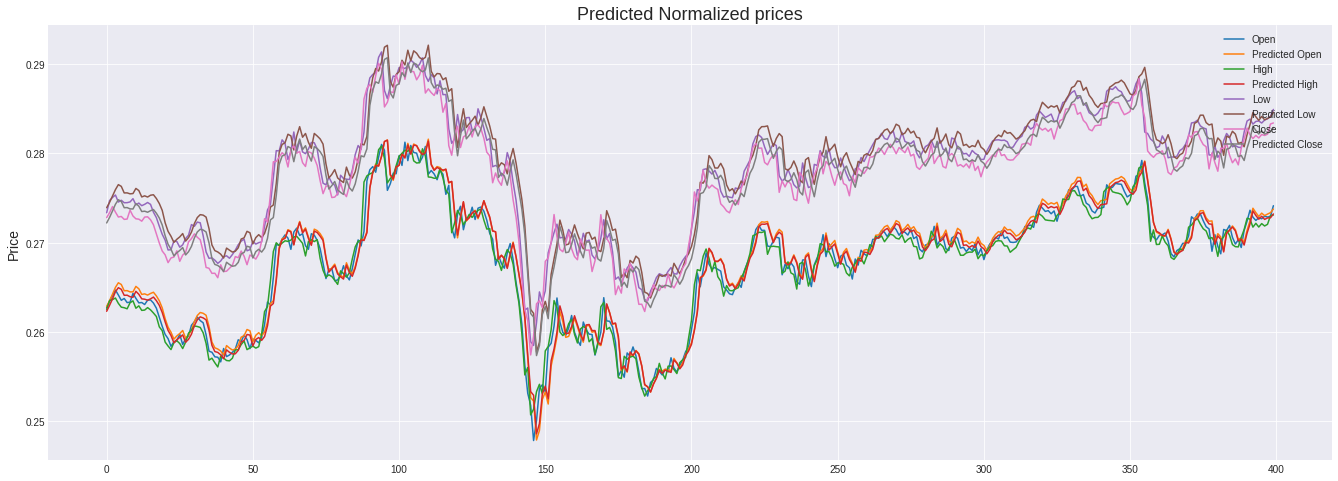

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.ion()
fig=plt.figure(figsize=(23,8))
ax1=fig.add_subplot(111)
line1=ax1.plot(y_test[:400,0],label='Open')
line2=ax1.plot(pred[:400,0],label='Predicted Open')
line3=ax1.plot(y_test[0:400,1],label='High')
line4=ax1.plot(pred[:400,1],label='Predicted High')
line3=ax1.plot(y_test[0:400,2],label='Low')
line4=ax1.plot(pred[:400,2],label='Predicted Low')
line3=ax1.plot(y_test[0:400,3],label='Close')
line4=ax1.plot(pred[:400,3],label='Predicted Close')

plt.title('Predicted Normalized prices',size=18)
plt.ylabel('Price',size=14)

plt.legend(loc='upper right')

plt.show()

In [ ]:
model.compile(optimizer="adam",loss="mse",metrics=['mse', 'mae', 'mape'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=20,epochs=12,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/12
8999/8999 [==============================] - 39s 4ms/step - loss: 1.1702e-06 - mse: 1.1702e-06 - mae: 7.3493e-04 - mape: 314.6116 - val_loss: 5.4619e-07 - val_mse: 5.4619e-07 - val_mae: 4.7591e-04 - val_mape: 0.2095
Epoch 2/12
8999/8999 [==============================] - 40s 4ms/step - loss: 1.1086e-06 - mse: 1.1086e-06 - mae: 7.2745e-04 - mape: 313.5024 - val_loss: 8.5921e-07 - val_mse: 8.5921e-07 - val_mae: 6.4497e-04 - val_mape: 0.2780
Epoch 3/12
8999/8999 [==============================] - 39s 4ms/step - loss: 1.1488e-06 - mse: 1.1488e-06 - mae: 7.4308e-04 - mape: 314.2129 - val_loss: 8.3974e-07 - val_mse: 8.3974e-07 - val_mae: 6.8763e-04 - val_mape: 0.2960
Epoch 4/12
8999/8999 [==============================] - 40s 4ms/step - loss: 1.1437e-06 - mse: 1.1437e-06 - mae: 7.4529e-04 - mape: 315.4945 - val_loss: 7.2369e-07 - val_mse: 7.2369e-07 - val_mae: 6.4029e-04 - val_mape: 0.2815
Epoch 5/12
8999/8999 [==============================] - 39s 4ms/step - loss: 1.1015e-06 - ms

In [ ]:
model.compile(optimizer="adam",loss="mse",metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=20,epochs=12,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/12
8999/8999 [==============================] - 37s 4ms/step - loss: 1.2547e-06 - accuracy: 0.9356 - val_loss: 5.5253e-07 - val_accuracy: 0.9298
Epoch 2/12
8999/8999 [==============================] - 36s 4ms/step - loss: 1.1937e-06 - accuracy: 0.9361 - val_loss: 5.5510e-07 - val_accuracy: 0.9298
Epoch 3/12
8999/8999 [==============================] - 35s 4ms/step - loss: 1.2262e-06 - accuracy: 0.9356 - val_loss: 1.1244e-06 - val_accuracy: 0.9299
Epoch 4/12
8999/8999 [==============================] - 37s 4ms/step - loss: 1.2056e-06 - accuracy: 0.9354 - val_loss: 6.3199e-07 - val_accuracy: 0.9246
Epoch 5/12
8999/8999 [==============================] - 35s 4ms/step - loss: 1.1184e-06 - accuracy: 0.9343 - val_loss: 7.8379e-07 - val_accuracy: 0.9267
Epoch 6/12
8999/8999 [==============================] - 36s 4ms/step - loss: 1.1853e-06 - accuracy: 0.9339 - val_loss: 5.7807e-07 - val_accuracy: 0.9307
Epoch 7/12
8999/8999 [==============================] - 35s 4ms/step - loss: 1.170

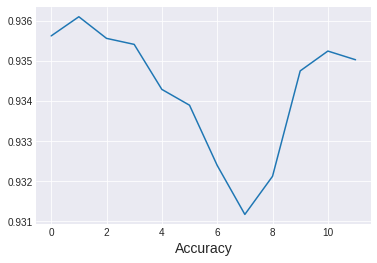

In [ ]:
pyplot.plot(history.history['accuracy'])
plt.xlabel('Accuracy',size=14)
pyplot.show()

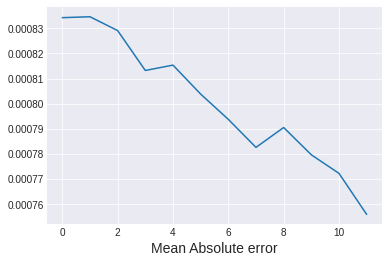

In [ ]:
pyplot.plot(history.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
pyplot.show()

Text(0.5, 0, 'Mean Absoulte Percentage Error')

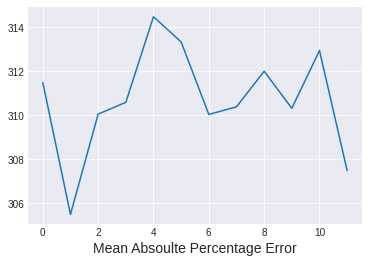

In [ ]:
pyplot.plot(history.history['mape'])
plt.xlabel('Mean Absoulte Percentage Error',size=14)

Text(0.5, 0, 'Mean Squared Error')

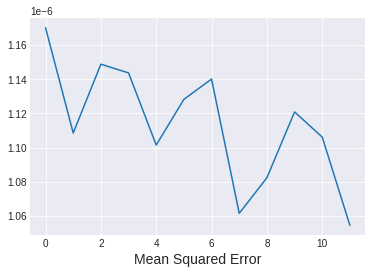

In [ ]:
pyplot.plot(history.history['mse'])
plt.xlabel('Mean Squared Error',size=14)

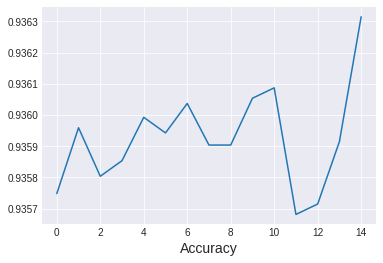

In [ ]:
pyplot.plot(history.history['accuracy'])
plt.xlabel('Accuracy',size=14)
pyplot.show()

In [ ]:
pred[:5]

array([[0.26288018, 0.26233158, 0.2739242 , 0.27221942],
       [0.2635266 , 0.26300526, 0.2745276 , 0.27284417],
       [0.2642505 , 0.2637177 , 0.27524617, 0.27356192],
       [0.265007  , 0.264523  , 0.27594787, 0.27431217],
       [0.26552445, 0.26497298, 0.276509  , 0.27481824]], dtype=float32)

In [ ]:
y_test[:5]

array([[0.26274112, 0.26254818, 0.27335814, 0.2728183 ],
       [0.26347679, 0.26352599, 0.27472979, 0.27337319],
       [0.26407707, 0.26364836, 0.27507272, 0.27405417],
       [0.26471058, 0.26381409, 0.27534705, 0.27343118],
       [0.26415628, 0.2632162 , 0.27455962, 0.27288389]])